In [22]:
import pandas as pd
#import pandas_profiling as pdp
import numpy as np
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt

np.random.seed(220409)

In [23]:
#df = pd.read_csv("drive/MyDrive/Colab Notebooks/SNA.csv")
df = pd.read_csv("data/SNA.csv")
df.tail()

,Unnamed: 0,Unnamed: 1,NDI,C
107,NaN,Q4,114442.5,106077.7
108,2021.0,Q1,106817.6,98991.7
109,NaN,Q2,NaN,NaN
110,NaN,Q3,NaN,NaN
111,NaN,Q4,NaN,NaN


In [24]:
df = df.drop(df.columns[[0,1]], axis = 1).dropna()
df.tail()
#pdp.ProfileReport(df)

,NDI,C
104,106615.8,101029.3
105,98556.2,97528.8
106,99273.8,98048.2
107,114442.5,106077.7
108,106817.6,98991.7


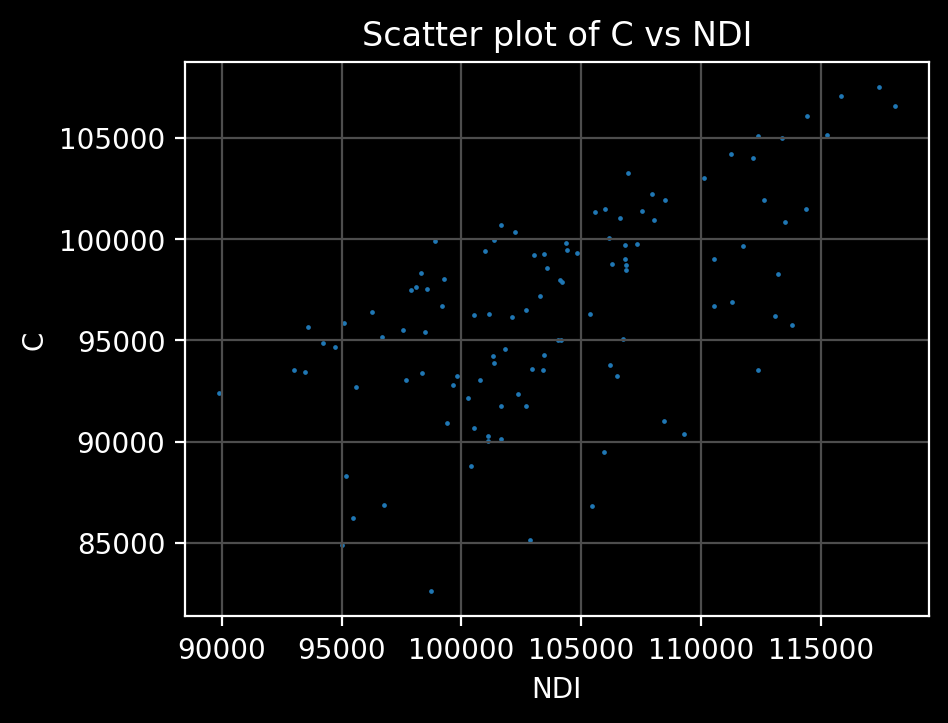

In [25]:
%matplotlib inline
plt.scatter(df[["NDI"]], df[["C"]], s=0.5)
plt.title("Scatter plot of C vs NDI")
plt.xlabel("NDI")
plt.ylabel("C")
plt.grid()

In [26]:
X = df[["NDI"]].values
Y = df[["C"]].values

X = sm.add_constant(X)     #切片付きOLSを実施
model_ols = sm.OLS(Y, X)   #
fit_ols = model_ols.fit()  #
print(fit_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     61.95
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           3.05e-12
Time:                        08:00:13   Log-Likelihood:                -1058.6
No. Observations:                 109   AIC:                             2121.
Df Residuals:                     107   BIC:                             2127.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         4.4e+04   6679.109      6.587      0.0

In [27]:
X[:,1]

array([ 98740.9,  95484.9,  95029.5, 108472.2, 102864.4,  95175.3,
        96760.2, 112367.5, 105455. , 100544.2, 100402.6, 113793.9,
       109282. , 102381.1, 101653.8, 113105.6, 105951.5, 100279.1,
       101115.8, 110530.7, 101125.4,  99798.1,  99414.7, 111317.7,
       101647.2, 101330.4, 102686.9, 113208. , 106506.8, 102092.6,
        97662.1, 106874. , 102961.6, 101170.5,  98331.9, 106870.1,
       100772.7, 100525.2,  99634.1, 110567.3, 103409.2, 102683.8,
       101353. , 111771.1, 106205.8, 103262.6, 101826. , 113502.4,
       104040.1, 104180.5, 103452.8, 114373.4, 106756.7, 106304.5,
       104145.2, 112616. , 105382.2, 104124. ,  98482.2, 104360.9,
        89861.5,  93593.4,  93007.6, 103459.3,  93479.9,  99207.4,
        96682.3, 104814.3,  95587.4,  95111.3,  94704.6, 102218.6,
        97538.8,  97904.8,  94206.3, 101648.9,  96262.4, 100999. ,
        98088.2, 106937.8,  98890. , 101338.6,  98326.8, 111254.8,
       103008.9, 108515.1, 104412.8, 113407.1, 106814.8, 10755

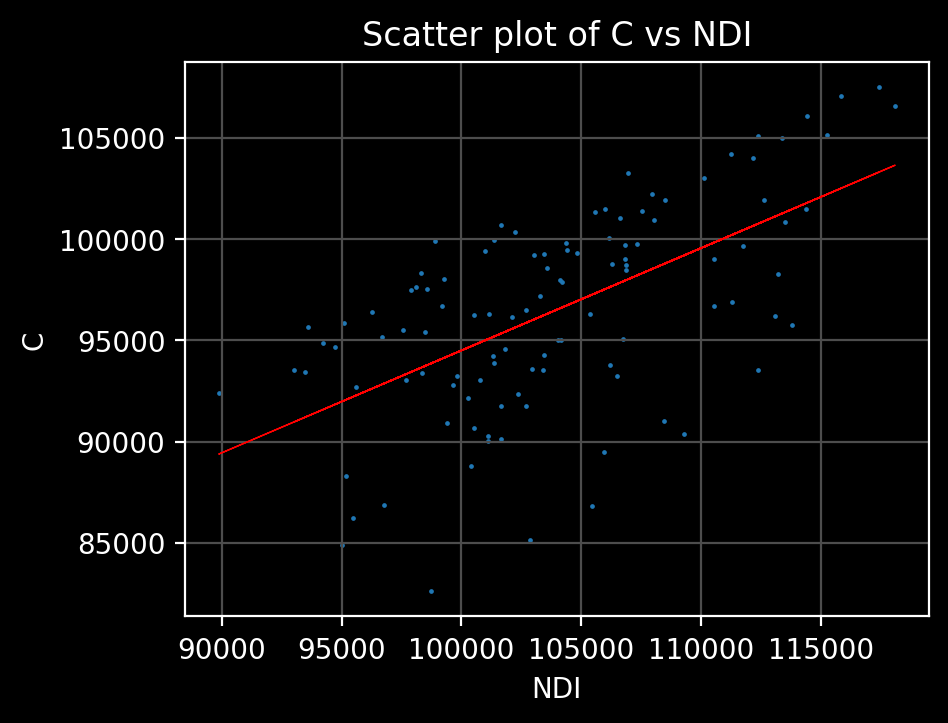

In [28]:
plt.scatter(df[["NDI"]], df[["C"]], s=0.5)
plt.plot(X[:,1], fit_ols.predict(), color = "red", linewidth=0.5)
plt.title("Scatter plot of C vs NDI")
plt.xlabel("NDI")
plt.ylabel("C")
plt.grid()

(array([ 3.,  2.,  3.,  9., 12., 11., 12., 18., 28., 11.]),
 array([-11258.01441227,  -9536.71478335,  -7815.41515444,  -6094.11552552,
         -4372.81589661,  -2651.51626769,   -930.21663878,    791.08299014,
          2512.38261905,   4233.68224797,   5954.98187688]),
 <a list of 10 Patch objects>)

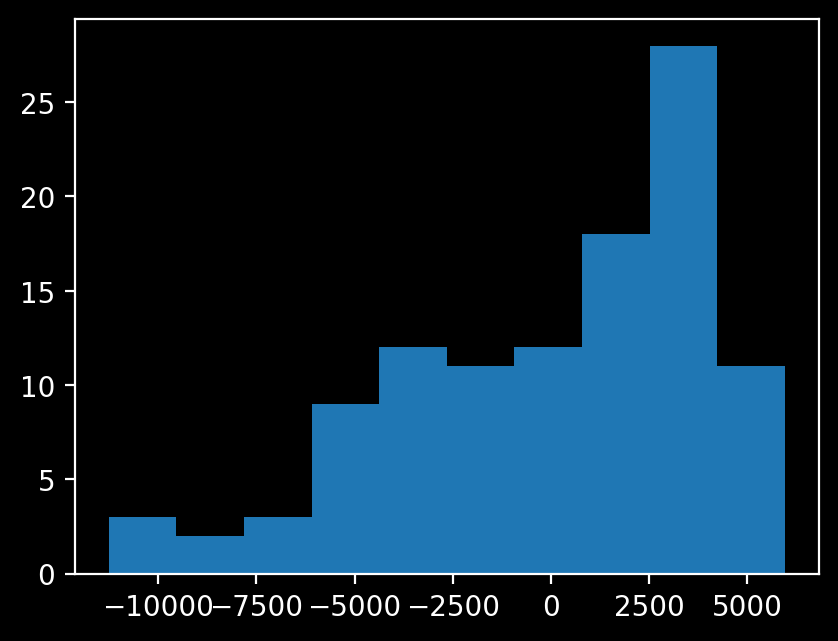

In [29]:
plt.hist(fit_ols.resid)

In [30]:
model_gls = sm.GLS(Y, X)
fit_gls = model_gls.fit()
print(fit_gls.summary())

                            GLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.367
Model:                            GLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     61.95
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           3.05e-12
Time:                        08:00:14   Log-Likelihood:                -1058.6
No. Observations:                 109   AIC:                             2121.
Df Residuals:                     107   BIC:                             2127.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         4.4e+04   6679.109      6.587      0.0